In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
!curl -O https://raw.githubusercontent.com/ermakovpetr/head_dataframe_by_chunk/master/head_dataframe_by_chunk.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   737  100   737    0     0   1120      0 --:--:-- --:--:-- --:--:--  1121


In [4]:
import head_dataframe_by_chunk

### Read *.csv file

In [5]:
train = pd.read_csv('laba04_train.csv')

In [6]:
train.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399589 entries, 0 to 399588
Data columns (total 117 columns):
Unnamed: 0                     int64
ID                             int64
CR_PROD_CNT_IL                 int64
AMOUNT_RUB_CLO_PRC             float64
PRC_ACCEPTS_A_EMAIL_LINK       float64
APP_REGISTR_RGN_CODE           float64
PRC_ACCEPTS_A_POS              float64
PRC_ACCEPTS_A_TK               float64
TURNOVER_DYNAMIC_IL_1M         float64
CNT_TRAN_AUT_TENDENCY1M        float64
SUM_TRAN_AUT_TENDENCY1M        float64
AMOUNT_RUB_SUP_PRC             float64
PRC_ACCEPTS_A_AMOBILE          float64
SUM_TRAN_AUT_TENDENCY3M        float64
CLNT_TRUST_RELATION            object
PRC_ACCEPTS_TK                 float64
PRC_ACCEPTS_A_MTP              float64
REST_DYNAMIC_FDEP_1M           float64
CNT_TRAN_AUT_TENDENCY3M        float64
CNT_ACCEPTS_TK                 float64
APP_MARITAL_STATUS             object
REST_DYNAMIC_SAVE_3M           float64
CR_PROD_CNT_VCU                int64
R

### Fill string with zeros

In [7]:
# train = train.drop(train.columns[train.dtypes=='object'], axis=1)
train[train.columns[train.dtypes=='object']] = 0

### Now only numbers in DataFrame

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399589 entries, 0 to 399588
Columns: 117 entries, Unnamed: 0 to TARGET
dtypes: float64(94), int64(23)
memory usage: 356.7 MB


### Fill NaN with zeros and drop unnecessary columns

In [9]:
train2 = train.fillna(value=0)

y = train.TARGET

train2 = train2.drop(['Unnamed: 0', 'ID', 'TARGET'], axis=1)

In [10]:
head_dataframe_by_chunk.head_dataframe_by_chunk(train2, size_chunk_columns=4, n_rows=15)

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE
0,0,0.000000,0.0,0.0
1,0,0.000000,0.0,0.0
2,0,0.000000,0.0,0.0
3,0,0.000000,0.0,0.0
4,0,0.000000,0.0,0.0
5,0,0.000000,0.0,0.0
6,0,0.018585,0.0,0.0
7,1,0.028064,0.0,77.0
8,3,0.000000,0.0,0.0
9,0,0.395599,0.0,0.0


,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M
0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.000000
5,0.0,0.0,0.0,0.000000
6,0.0,0.0,0.0,0.500000
7,0.0,0.0,0.0,0.142857
8,0.0,0.0,0.0,0.000000
9,0.0,0.0,0.0,1.000000


,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,PRC_ACCEPTS_A_AMOBILE,SUM_TRAN_AUT_TENDENCY3M
0,0.000000,0.000000,0.0,0.000000
1,0.000000,0.027168,0.0,0.000000
2,0.000000,0.114951,0.0,0.000000
3,0.000000,0.000000,0.0,0.000000
4,0.000000,0.011541,0.0,1.000000
5,0.000000,0.000000,0.0,0.000000
6,0.345764,0.191874,0.0,1.000000
7,0.179546,0.050236,0.0,0.434406
8,0.000000,0.000000,0.0,0.000000
9,1.000000,0.029018,0.0,1.000000


,CLNT_TRUST_RELATION,PRC_ACCEPTS_TK,PRC_ACCEPTS_A_MTP,REST_DYNAMIC_FDEP_1M
0,0,0.0,0.0,0.0
1,0,0.0,0.0,0.0
2,0,0.0,0.0,0.0
3,0,0.0,0.0,0.0
4,0,0.0,0.0,0.0
5,0,0.0,0.0,0.0
6,0,0.0,0.0,0.0
7,0,0.0,0.0,0.0
8,0,0.0,0.0,0.0
9,0,0.0,0.0,0.0


,CNT_TRAN_AUT_TENDENCY3M,CNT_ACCEPTS_TK,APP_MARITAL_STATUS,REST_DYNAMIC_SAVE_3M
0,0.000000,0.0,0,0.0000
1,0.000000,0.0,0,0.0000
2,0.000000,0.0,0,0.0000
3,0.000000,0.0,0,0.0000
4,1.000000,0.0,0,0.0000
5,0.000000,0.0,0,0.0000
6,1.000000,0.0,0,0.0000
7,0.428571,0.0,0,0.0000
8,0.000000,0.0,0,0.4878
9,1.000000,0.0,0,0.0000


,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,APP_KIND_OF_PROP_HABITATION
0,0,1.906969e+04,0.00,0
1,0,5.951209e+03,0.00,0
2,0,3.774583e+03,0.25,0
3,0,1.485683e+05,0.00,0
4,0,6.923339e+04,0.00,0
5,0,2.182862e+05,0.00,0
6,0,2.245738e+04,0.00,0
7,0,5.746468e+04,0.00,0
8,1,3.994592e+02,0.00,0
9,0,1.274584e+06,0.00,0


,CLNT_JOB_POSITION_TYPE,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,APP_DRIVING_LICENSE
0,0,0.000000,0,0
1,0,0.048746,0,0
2,0,0.004519,0,0
3,0,0.000000,0,0
4,0,0.000000,0,0
5,0,0.000000,0,0
6,0,0.000000,0,0
7,0,0.023949,0,0
8,0,0.000000,0,0
9,0,0.043595,0,0


,TRANS_COUNT_SUP_PRC,APP_EDUCATION,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M
0,0.000000,0,0.000000,0.000000
1,0.030303,0,0.000000,0.000000
2,0.363636,0,0.000000,0.279487
3,0.000000,0,0.000000,0.000000
4,0.083333,0,0.000000,0.000000
5,0.000000,0,0.000000,0.000000
6,0.577236,0,1.000000,0.000000
7,0.183486,0,0.000000,0.000000
8,0.000000,0,0.000000,0.000000
9,0.046154,0,0.074074,0.000000


,PRC_ACCEPTS_A_ATM,PRC_ACCEPTS_MTP,TRANS_COUNT_NAS_PRC,APP_TRAVEL_PASS
0,0.0,0.0,0.000000,0
1,0.0,0.0,0.030303,0
2,0.0,0.0,0.136364,0
3,0.0,0.0,0.000000,0
4,0.0,0.0,0.000000,0
5,0.0,0.0,0.000000,0
6,0.0,0.0,0.000000,0
7,0.0,0.0,0.096330,0
8,0.0,0.0,0.000000,0
9,0.0,0.0,0.161538,0


,CNT_ACCEPTS_MTP,CR_PROD_CNT_TOVR,APP_CAR,CR_PROD_CNT_PIL
0,0.0,1,0,0
1,0.0,1,0,0
2,0.0,1,0,0
3,0.0,0,0,0
4,0.0,0,0,0
5,0.0,0,0,0
6,0.0,1,0,0
7,0.0,0,0,0
8,0.0,2,0,0
9,0.0,0,0,0


,SUM_TRAN_CLO_TENDENCY1M,APP_POSITION_TYPE,TURNOVER_CC,TRANS_COUNT_ATM_PRC
0,0.000000,0,0.0,0.981818
1,0.000000,0,0.0,0.090909
2,0.000000,0,0.0,0.136364
3,0.000000,0,0.0,0.666667
4,0.000000,0,0.0,0.250000
5,0.000000,0,0.0,0.000000
6,1.000000,0,0.0,0.056911
7,0.000000,0,0.0,0.169725
8,0.000000,0,0.0,1.000000
9,0.150264,0,0.0,0.015385


,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M
0,0.926472,0.000000,324,0.000000
1,0.292473,0.000000,360,0.000000
2,0.533251,0.000000,600,1.000000
3,0.761035,0.000000,732,0.000000
4,0.486608,0.000000,480,0.000000
5,0.000000,0.000000,468,0.000000
6,0.431679,0.000000,420,0.789474
7,0.546033,0.000000,564,0.500000
8,1.000000,0.000000,408,0.000000
9,0.003479,0.000000,504,0.545455


,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M
0,0,0.000000,0.0,0.0
1,0,0.000000,0.0,0.0
2,0,1.000000,0.0,0.0
3,0,0.000000,0.0,0.0
4,0,0.000000,0.0,0.0
5,0,0.000000,0.0,0.0
6,0,0.819603,0.0,0.0
7,0,0.685860,0.0,0.0
8,0,0.000000,0.0,0.0
9,0,0.219638,0.0,0.0


,APP_EMP_TYPE,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG
0,0,0.000000,0.0,0.0
1,0,0.000000,0.0,0.0
2,0,0.000000,0.0,0.0
3,0,0.000000,0.0,0.0
4,0,0.000000,0.0,0.0
5,0,0.000000,0.0,0.0
6,0,1.000000,0.0,0.0
7,0,0.000000,0.0,0.0
8,0,0.000000,7.0,0.0
9,0,0.455990,0.0,0.0


,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,LDEAL_YQZ_COM,DEAL_YQZ_IR_MIN
0,0,0.00,0.0,0.00
1,0,0.00,0.0,0.00
2,0,0.00,0.0,0.00
3,0,0.00,0.0,0.00
4,0,0.00,0.0,0.00
5,0,0.00,0.0,0.00
6,0,0.00,0.0,0.00
7,0,0.00,0.0,0.00
8,0,32.00,0.0,32.00
9,0,0.00,0.0,0.00


,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_TENOR_MIN
0,0.000000,0.139327,0.000000,0.0
1,0.000000,0.163876,0.000000,0.0
2,0.000000,0.073887,0.000000,0.0
3,0.000000,0.165847,0.000000,0.0
4,0.000000,0.055603,0.000000,0.0
5,0.000000,0.166294,0.000000,0.0
6,1.000000,0.101100,0.000000,0.0
7,0.000000,0.143370,0.000000,0.0
8,0.000000,0.531076,0.000000,7.0
9,0.555556,0.270296,0.000000,0.0


,LDEAL_AMT_MONTH,APP_COMP_TYPE,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M
0,0.0,0,0.0,0.244042
1,0.0,0,0.0,0.465244
2,0.0,0,0.0,0.490018
3,0.0,0,0.0,0.497541
4,0.0,0,0.0,0.247153
5,0.0,0,0.0,0.499213
6,0.0,0,0.0,0.567836
7,0.0,0,0.0,0.514340
8,0.0,0,0.0,0.533095
9,0.0,0,0.0,0.654287


,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M
0,0.000000,0.144300,0.000000,0.000000
1,1.000000,0.203484,0.000000,1.000000
2,0.375000,0.090256,0.000000,0.317348
3,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.316277,0.000000,0.000000
5,0.000000,0.059319,0.000000,0.000000
6,0.788732,0.479582,0.000000,0.789287
7,0.575000,0.106630,0.000000,0.507493
8,0.000000,0.781770,0.000000,0.000000
9,0.833333,0.462342,0.000000,0.793950


,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M
0,0.000000,0.351852,0.166667,0.000000
1,0.000000,0.333333,0.333333,0.000000
2,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.666667,0.666667,0.000000
5,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.428571,0.142857,0.000000
7,0.000000,0.621622,0.243243,0.000000
8,0.242649,1.000000,1.000000,0.003443
9,0.000000,1.000000,0.000000,0.000000


,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN
0,0.329321,0.0,0.0,45.0
1,0.333333,0.0,0.0,45.0
2,0.000000,0.0,0.0,45.0
3,0.000000,0.0,0.0,0.0
4,0.416697,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0
6,0.393178,0.0,0.0,45.0
7,0.811612,0.0,0.0,0.0
8,1.000000,0.0,0.0,45.0
9,1.000000,0.0,0.0,0.0


,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M
0,0.000000,45.0,0.167901,0.000000
1,0.000000,45.0,0.333333,0.000000
2,0.000000,45.0,0.000000,0.000000
3,0.000000,0.0,0.000000,0.000000
4,0.000000,0.0,0.416697,0.000000
5,0.000000,0.0,0.000000,0.000000
6,0.170961,45.0,0.341113,0.000000
7,0.295142,0.0,0.067419,0.000000
8,0.000000,45.0,1.000000,0.000000
9,0.054243,0.0,0.000000,0.000000


,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,PACK
0,0.000000,0.0,0.303750,0
1,0.000000,0.0,0.504160,0
2,0.000000,0.0,0.351398,0
3,0.000000,0.0,0.000000,0
4,0.000000,0.0,0.735125,0
5,0.000000,0.0,0.266559,0
6,0.225352,0.0,0.630066,0
7,0.275000,0.0,0.572337,0
8,0.000000,0.0,0.781770,0
9,0.166667,0.0,0.583824,0


,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX
0,0.0,0.0,5.480001,0.0
1,0.0,0.0,6.786453,0.0
2,0.0,0.0,8.528388,0.0
3,0.0,0.0,3.291829,0.0
4,0.0,0.0,5.160219,0.0
5,0.0,0.0,7.574206,0.0
6,0.0,0.0,7.146779,0.0
7,0.0,0.0,3.652163,0.0
8,0.0,0.0,9.947854,0.0
9,0.0,0.0,10.377961,0.0


,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE
0,0.000000,0.0,0.000000,0.0
1,0.000000,0.0,0.000000,0.0
2,0.000000,0.0,0.000000,0.0
3,0.000000,0.0,0.000000,0.0
4,0.000000,0.0,0.000000,0.0
5,0.000000,0.0,0.000000,0.0
6,0.000000,0.0,0.000000,0.0
7,0.000000,0.0,0.000000,0.0
8,0.000000,0.0,0.000000,0.0
9,0.000000,0.0,0.000000,0.0


,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ
0,0.305106,0.0,0.345455,0.000000
1,0.368799,0.0,0.454545,0.000000
2,0.358522,0.0,0.318182,0.000000
3,0.000000,0.0,0.000000,0.000000
4,0.688108,0.0,0.750000,0.000000
5,0.000000,0.0,0.000000,0.000000
6,0.608378,0.0,0.764228,0.000000
7,0.657384,0.0,0.509174,0.000000
8,1.000000,1.0,1.000000,0.647832
9,0.670976,0.0,0.538462,0.000000


,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0


,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3
0,0.003524,0.0,0.0,0.00000
1,0.000618,0.0,0.0,0.00000
2,0.027484,0.0,0.0,0.00000
3,0.000000,0.0,0.0,0.00000
4,0.000000,0.0,0.0,0.00000
5,0.000000,0.0,0.0,0.00000
6,0.026869,0.0,0.0,0.00000
7,0.000000,0.0,0.0,0.00000
8,0.000000,0.0,0.0,0.00000
9,0.000000,0.0,0.0,0.00000


,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR
0,0.00000,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0
5,0.00000,0.0,0.0,0.0
6,0.00000,0.0,0.0,0.0
7,0.00000,0.0,0.0,0.0
8,0.00000,0.0,0.0,0.0
9,0.00000,0.0,0.0,0.0


,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [11]:
from sklearn.cross_validation import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    train2,
    y,
    test_size=0.10,
    random_state=42
)

In [13]:
# from sklearn.linear_model import LogisticRegression

In [14]:
# lr = LogisticRegression()

In [15]:
# lr.fit(X_train, y_train)
# pred = lr.predict_proba(X_test)

In [27]:
boostregr = xgb.XGBRegressor(max_depth = 5,
                             objective = 'binary:logistic'
                             ).fit(X_train, y_train)

In [28]:
predXGBRegressor = boostregr.predict(X_test)

In [29]:
predXGBRegressor

array([ 0.21055011,  0.22917004,  0.41291273, ...,  0.00461957,
        0.03683629,  0.05262438], dtype=float32)

In [31]:
from sklearn import metrics

In [32]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predXGBRegressor)

In [27]:
# fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])

### ROC

(-0.01, 1.01)

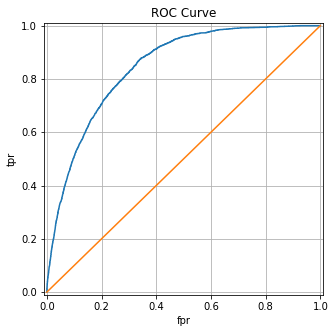

In [33]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC Curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

### ROC AUC

In [34]:
metrics.roc_auc_score(y_test, predXGBRegressor)

0.8456737951832205